<a href="https://colab.research.google.com/github/arjanafridi123/AirBnb-Bookings-Analysis-EDA-Capstone-Project/blob/main/AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AirBNB Bookings Analysis

# Project Summary

This project aims to analyze Airbnb listings across New York City for the year 2019 to uncover insights into pricing, availability, and listing trends. The dataset includes detailed information such as room types, listing prices, geographic locations, host activity, and customer reviews. By exploring these features, the analysis provides valuable insights into the Airbnb market dynamics in NYC. The findings help support better business decisions, improve host strategies, and enhance the overall experience for guests on the platform.



Understand the distribution of listings across boroughs and neighborhoods.
Identify pricing patterns based on location, room type, and availability.
Test assumptions about what influences listing price and popularity.

# Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python/EDA Capstone Project/CSF Files/Airbnb NYC 2019.csv')

# Top 5 rows of dataset

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Last 5 rows of dataset

In [ ]:
df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# Shape of dataset

In [ ]:
df.shape

(48895, 16)

# Information of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Information about the descriptions of the data set

In [ ]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


# Checking for duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

# Getting the information about the null value

In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


# Dropping columns

In [ ]:
df.drop(['name', 'host_name'], axis=1, inplace=True)

# For reviews_per_month, fill NA with 0

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Again checking for null values

In [ ]:
df.isnull().sum()

,0
id,0
host_id,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0


# Handling Outliers

In [ ]:
price_cap = df['price'].quantile(0.99)
df = df[df['price'] <= price_cap]

# Cap minimum nights at 95th percentile

In [ ]:
min_night_cap = df['minimum_nights'].quantile(0.95)
df = df[df['minimum_nights'] <= min_night_cap]

# Categorical Value Counts

In [ ]:
df['room_type'].value_counts()

,count
room_type,
Entire home/apt,24536
Private room,22031
Shared room,1136


In [ ]:
df['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Manhattan,20908
Brooklyn,19757
Queens,5598
Bronx,1075
Staten Island,365


# Room Type Distribution

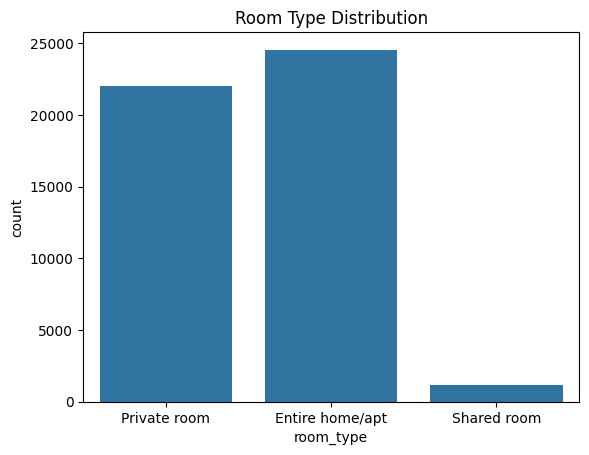

In [ ]:
sns.countplot(x='room_type', data=df)
plt.title('Room Type Distribution')
plt.show()

# Average Price by Room Type

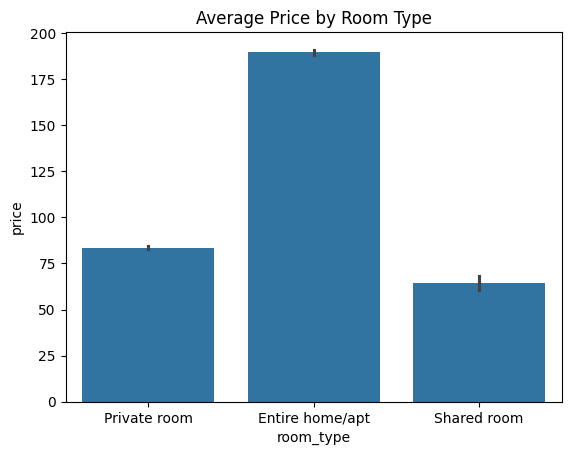

In [ ]:
sns.barplot(x='room_type', y='price', data=df)
plt.title('Average Price by Room Type')
plt.show()

# Average Price by Neighbourhood Group

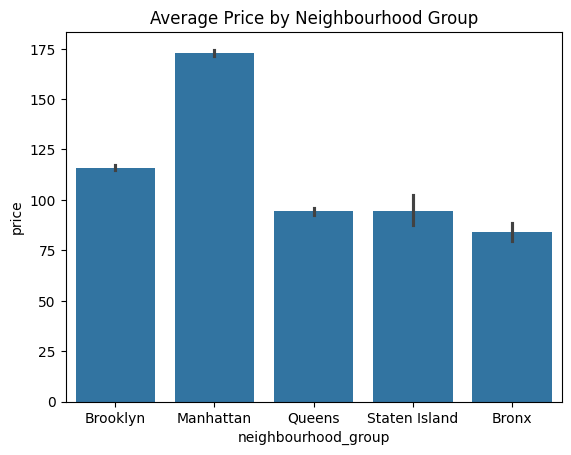

In [ ]:
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.title('Average Price by Neighbourhood Group')
plt.show()

# Price Distribution

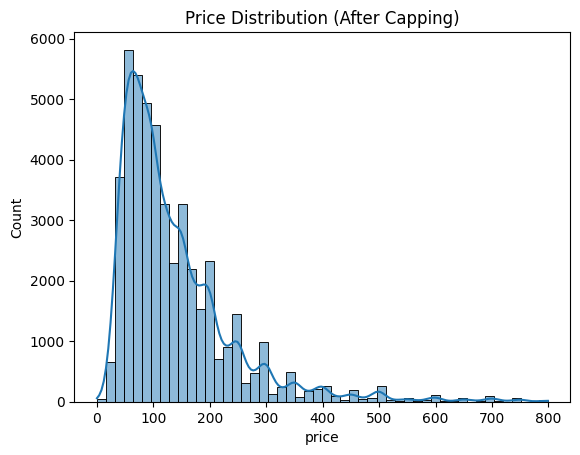

In [ ]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution (After Capping)')
plt.show()

# Availability by Neighbourhood Group

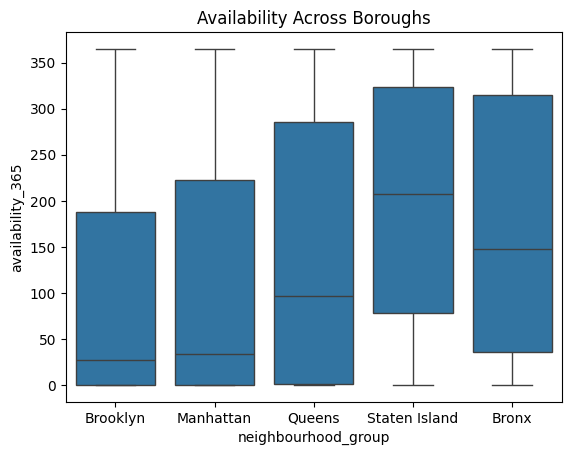

In [ ]:
sns.boxplot(x='neighbourhood_group', y='availability_365', data=df)
plt.title('Availability Across Boroughs')
plt.show()

# Correlation Heatmap

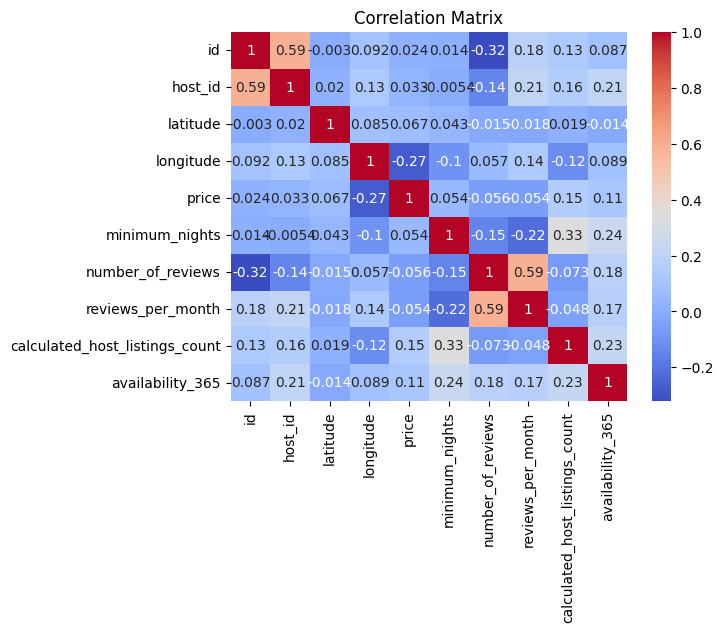

In [ ]:
numerics = df.select_dtypes(include=[np.number])
sns.heatmap(numerics.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Geospatial Visualization (Scatter Plot)

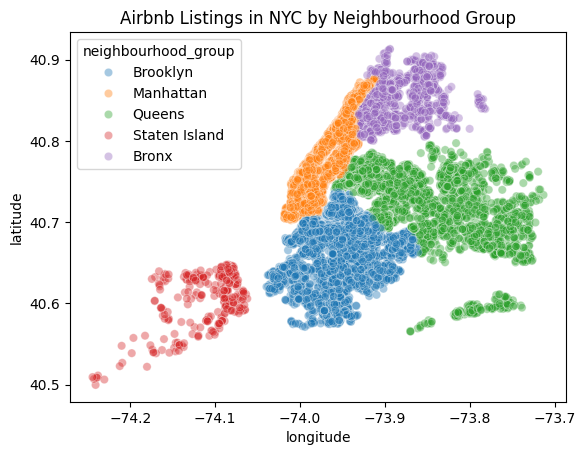

In [ ]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.4)
plt.title('Airbnb Listings in NYC by Neighbourhood Group')
plt.show()